In [37]:
DEV = True

In [127]:
import os
import getpass
import numpy as np
import pandas as pd
from numpy.random import seed
seed(1)

project_path = 'C:/Users/' + getpass.getuser() + '/Desktop/10 - Thesis/cycle_prediction/'
project_exist = os.path.exists(project_path)
if project_exist and DEV:
    import sys
    sys.path.insert(0, project_path)
    print('development mode')
    np.set_printoptions(suppress=True)
    np.set_printoptions(linewidth=np.inf)
    pd.set_option('max_rows', 50)
    pd.set_option('max_columns', 50)
else:
    print('user mode')
    
import cycle_prediction
print(cycle_prediction.__version__)
from cycle_prediction.t2e import t2e
from cycle_prediction.weibull_utils import plot_top_predictions

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import pickle
import warnings
warnings.filterwarnings("ignore")
import os
%load_ext autoreload
%autoreload 2

development mode
1.2.0
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [207]:
path = '../data/'
b = os.path.join(path,'bpi_12_w_no_repeat.csv')
b = pd.read_csv(b)
e = os.path.join(path,'bpic13_all.csv')
e = pd.read_csv(e)

df_name = {
    'e':'bpic13_all',
    'b':'bpic12'
}

df_dict = {
    'e': e,
    'b': b
}
range_dict = {
    'e': range(2,22,2),
    'b': range(2,22,2)
}

In [221]:
dataset='e'
res='d'
extra_censored=0
fit_type:'t2e'
transform = False
prefix=4
end_event_list = ['Completed+Closed', 'Completed+In Call', 'Completed-Closed', 
                  'Completed+Resolved', 'Completed+Cancelled', 'Completed-Cancelled']
# end_event_list = ['6']
##########################################################
t2e_obj = t2e(df_dict[dataset],
              prefix = prefix,
              resolution = res,
              extra_censored = extra_censored,
              fit_type = 't2e',
              transform = transform,
              end_event_list = end_event_list
             )
t2e_obj.preprocess()
X_train, X_test, X_val, y_train, y_test, y_val, len_train, len_val, len_test = t2e_obj.smart_split(train_prc = 0.7,
                                                                                                     val_prc = 0.45,
                                                                                                      scaling=True)

INFO 2020-11-29 13:47:58 - Prefix = 4
INFO 2020-11-29 13:47:58 - Total    cases: 9395
INFO 2020-11-29 13:47:58 - Prefix   cases: 5496
INFO 2020-11-29 13:47:58 - Censored cases: 32
INFO 2020-11-29 13:47:58 - Observed cases: 5464
INFO 2020-11-29 13:48:24 - Training   : 2136
INFO 2020-11-29 13:48:24 - Validation : 1720
INFO 2020-11-29 13:48:24 - Testing    : 1640


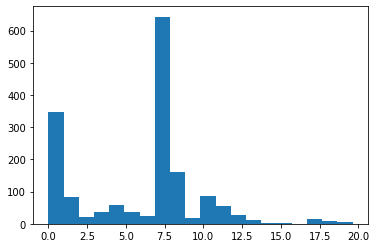

In [226]:
plt.hist(y_test[:,0], bins = 20);

In [214]:
print("Layer size:",8, end = " ..... ")
t2e_obj.fit(X_train, y_train, X_val, y_val,size=8, vb = True)
print("Done")
print("Training accomplished in", t2e_obj.fit_time, "seconds")
try:
    test_result_df, mae, accuracy = t2e_obj.evaluate(X_test,y_test)
    print('power:', t2e_obj.power)
    print(len(test_result_df['T_pred'].unique()), 'unique predictions')
    print(np.round(mae,3), 'mae')
except:
    print('evaluation failed')

Layer size: 8 ..... 

Epoch 1/500
16/17 [===========================>..] - ETA: 0s - loss: 2.9649
Epoch 00001: val_loss improved from inf to 3.12213, saving model to output/best_model.h5
17/17 [==============================] - 1s 82ms/step - loss: 2.8944 - val_loss: 3.1221
Epoch 2/500
16/17 [===========================>..] - ETA: 0s - loss: 2.6378
Epoch 00002: val_loss did not improve from 3.12213
17/17 [==============================] - 1s 73ms/step - loss: 2.5895 - val_loss: 3.1248
Epoch 3/500
16/17 [===========================>..] - ETA: 0s - loss: 2.3489
Epoch 00003: val_loss did not improve from 3.12213
17/17 [==============================] - 1s 72ms/step - loss: 2.3161 - val_loss: 3.1468
Epoch 4/500
16/17 [===========================>..] - ETA: 0s - loss: 2.1819
Epoch 00004: val_loss improved from 3.12213 to 3.06745, saving model to output/best_model.h5
17/17 [==============================] - 1s 74ms/step - loss: 2.1590 - val_loss: 3.0674
Epoch 5/500
16/17 [===================

Epoch 37/500
16/17 [===========================>..] - ETA: 0s - loss: 1.3108
Epoch 00037: val_loss did not improve from 2.60849
17/17 [==============================] - 1s 74ms/step - loss: 1.3113 - val_loss: 6.1434


INFO 2020-11-29 00:25:04 - model loaded successfully


Epoch 00037: early stopping
Done
Training accomplished in 50.0 seconds
evaluation failed


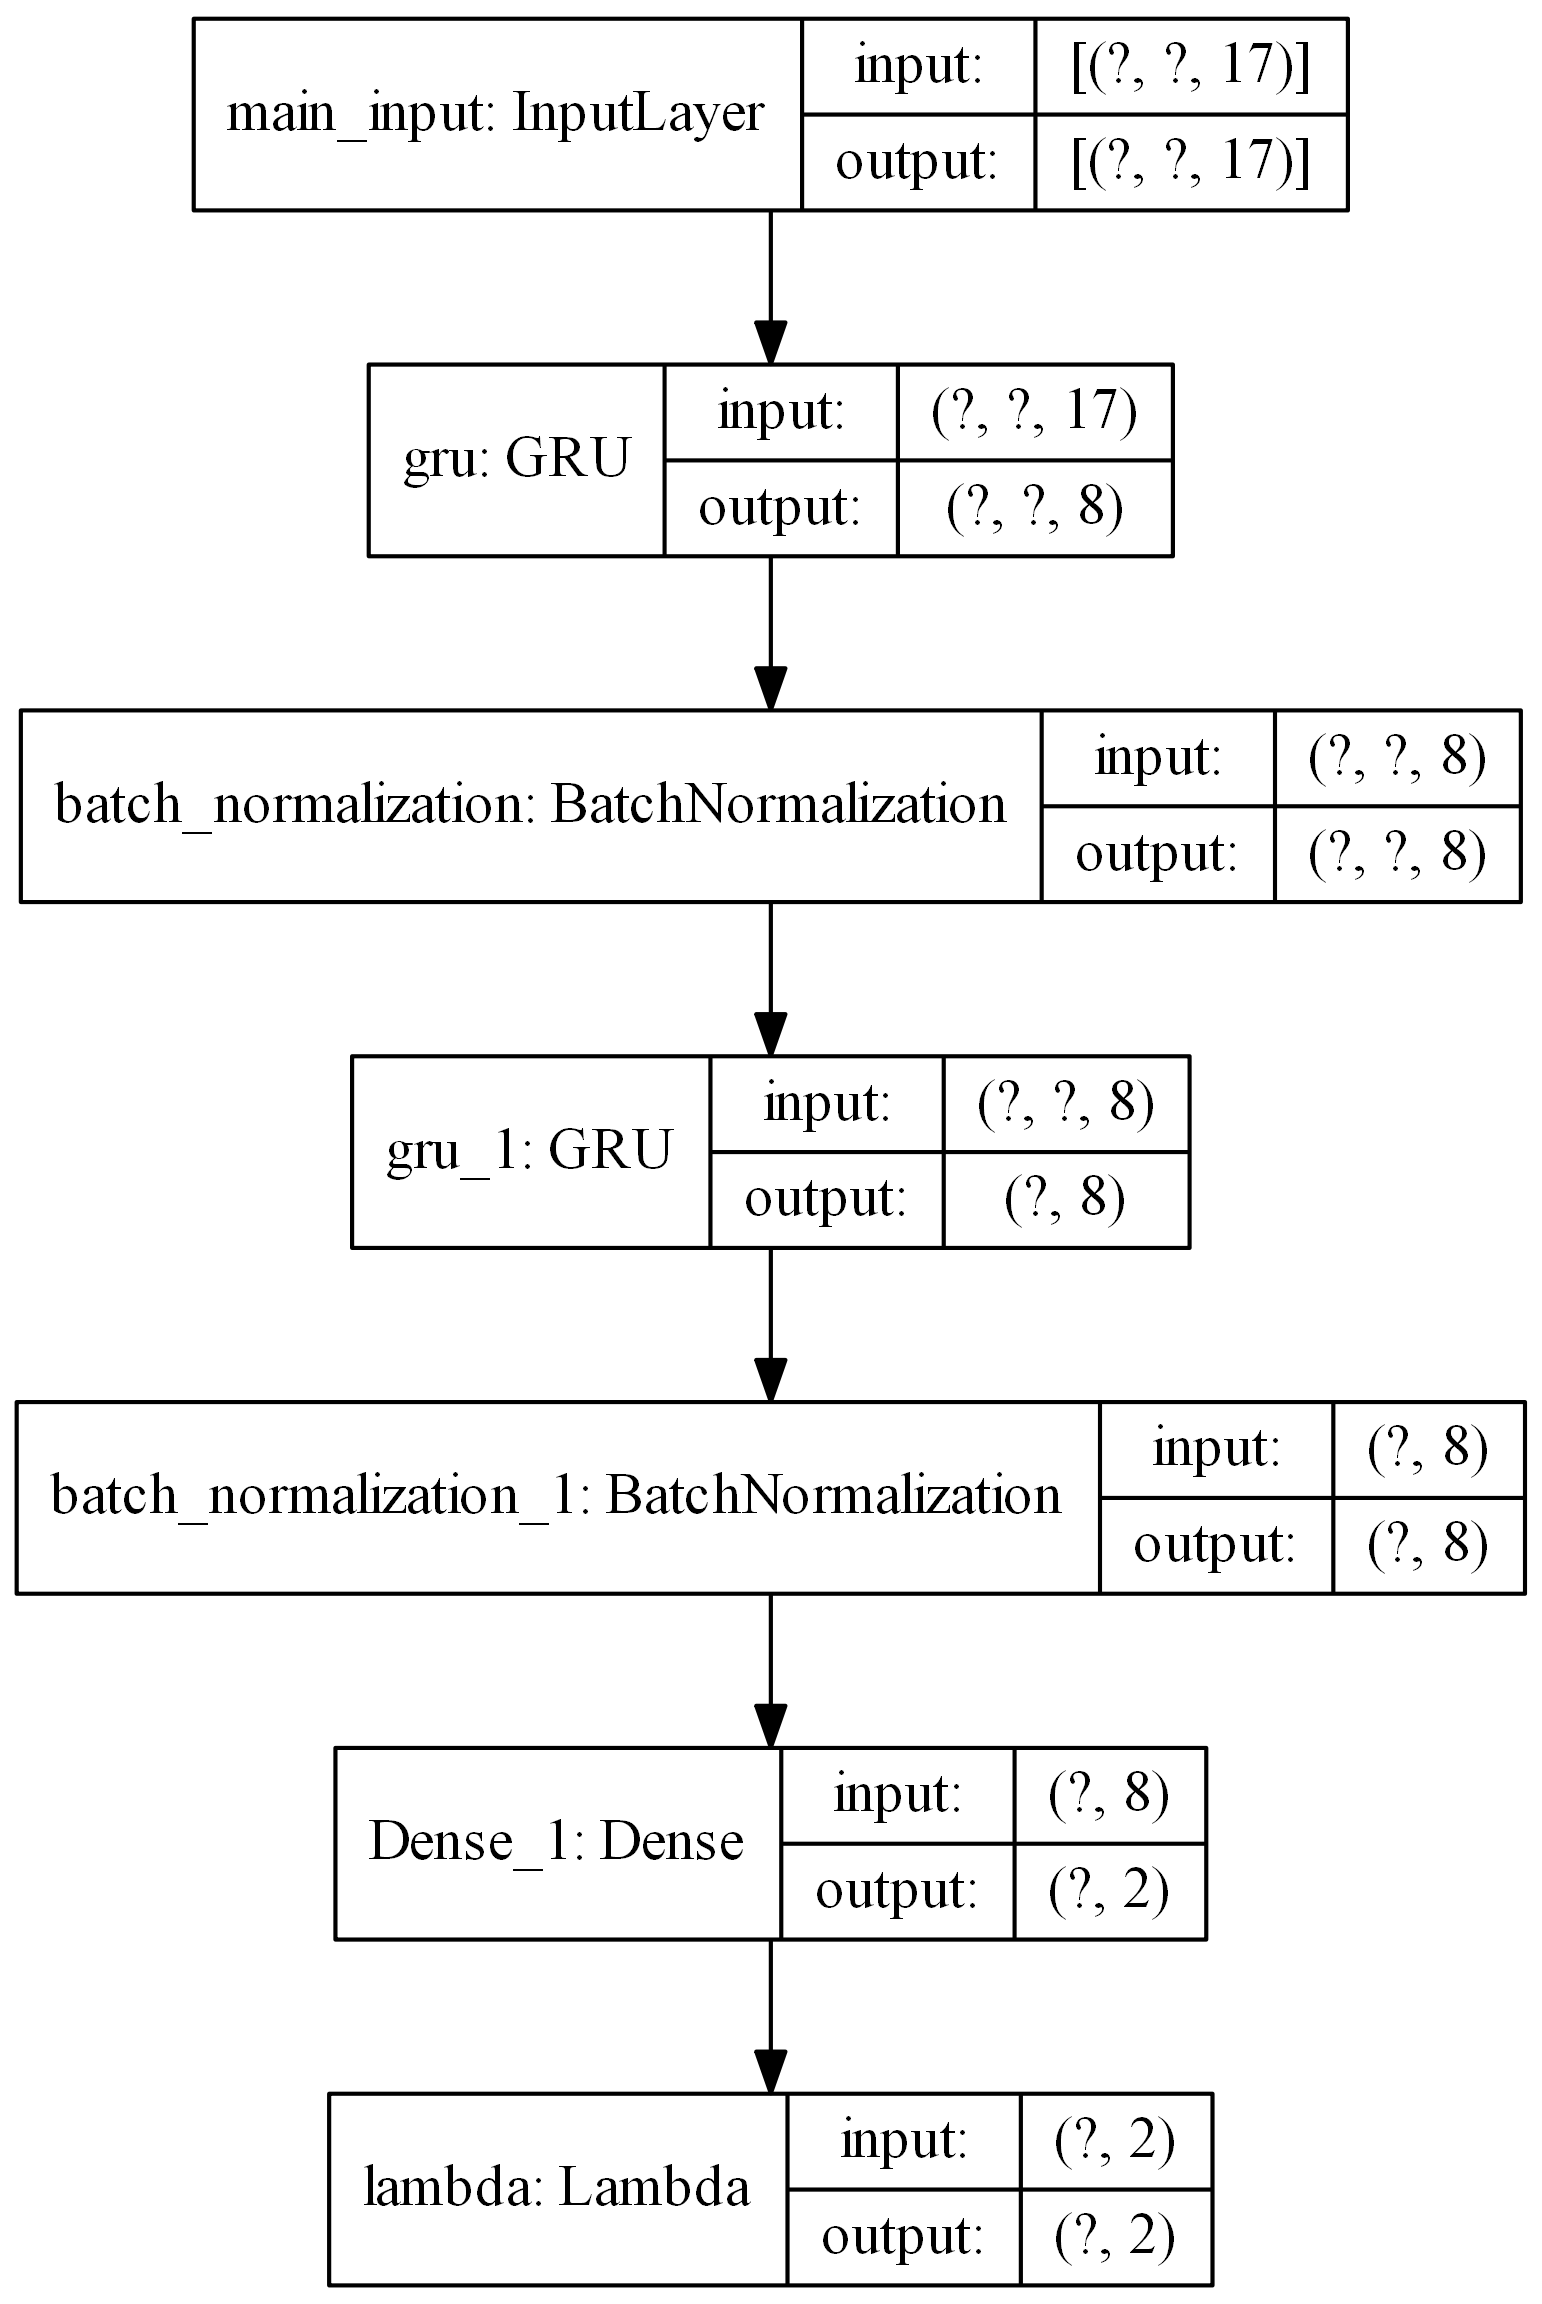

In [8]:
from tensorflow.keras.utils import plot_model
model = t2e_obj.model

plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TR', expand_nested=False, dpi=300
)